This project explores a dataset of used cars collected from Cars24, an online resale platform. The data contains details such as year of manufacture, car model, fuel type, transmission, ownership history, kilometers driven, location, and the resale price in lakhs. My main goal is to understand what factors drive the resale value of cars and My target variable is Price. 

In [2]:
### Import libraies
import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.

In [3]:
# Load data from CSV
df = pd.read_csv('data/Cars24.csv')

In [4]:
# Display the first 5 rows of the DataFrame to understand its structure.
df.head()

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.79,Badharghat Agartala


In [5]:
df.shape

(9176, 9)

In [6]:
# Returns information about the DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9176 entries, 0 to 9175
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9176 non-null   int64  
 1   Car Model          9176 non-null   object 
 2   Car Variant        9176 non-null   object 
 3   KM Driven          9176 non-null   int64  
 4   Fuel Type          9176 non-null   object 
 5   Transmission Type  9176 non-null   object 
 6   Ownership          9176 non-null   object 
 7   Price(in Lakhs)    9175 non-null   float64
 8   Location           9173 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 645.3+ KB


In [7]:
# Return summary statistics for numerical columns in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,9176.0,2017.147777,3.992440,2001.0,2014.0,2017.00,2021.00,2025.0
KM Driven,9176.0,89533.652354,395485.704208,1.0,44735.0,75680.00,110000.00,37270000.0
Price(in Lakhs),9175.0,6.105006,5.334563,0.3,2.7,4.61,7.59,67.0


In [8]:
df.columns

Index(['Year', 'Car Model', 'Car Variant', 'KM Driven', 'Fuel Type',
       'Transmission Type', 'Ownership', 'Price(in Lakhs)', 'Location'],
      dtype='object')

In [9]:
# Check for duplicates in each column and print the count of duplicates for each column.
for col in df.columns:
    duplicated_count = df[col].duplicated().sum()
    print((f"Column: {col}"))
    print(f"Duplicated Count: {duplicated_count}")
    print("*" * 30)

Column: Year
Duplicated Count: 9154
******************************
Column: Car Model
Duplicated Count: 8902
******************************
Column: Car Variant
Duplicated Count: 7400
******************************
Column: KM Driven
Duplicated Count: 4649
******************************
Column: Fuel Type
Duplicated Count: 9171
******************************
Column: Transmission Type
Duplicated Count: 9174
******************************
Column: Ownership
Duplicated Count: 9167
******************************
Column: Price(in Lakhs)
Duplicated Count: 7701
******************************
Column: Location
Duplicated Count: 4217
******************************


In [10]:
# check no identical rows
duplicated_multi_cols = df[df.duplicated(
    subset = ['Car Model', 'Location'],
    keep=False
)]
duplicated_multi_cols.shape

(1567, 9)

In [11]:
duplicated_multi_cols.head()


,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
103,2011,Toyota Fortuner,3.0 4X2 MT,160000,Diesel,Manual,3rd owner,6.50,Sector 18 Gurugram
237,2017,Tata Zest,XE 75PS DIESEL,110000,Diesel,Manual,1st owner,2.38,Sector 18 Gurugram
276,2021,MG HECTOR,SHARP 2.0 DIESEL,150000,Diesel,Manual,1st owner,10.50,Kherado Alwar Rajasthan
277,2024,MG HECTOR,SHARP PRO 2.0 TURBO DIESEL,29520,Diesel,Manual,1st owner,19.00,Kherado Alwar Rajasthan
278,2016,Honda City,1.5L I-VTEC VX,120000,Petrol,Manual,3rd owner,4.50,Defence Colony Ambala Cantt


In [12]:
# Columns where all values are the same (constant features)
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: []


In [13]:
# Columns with mostly missing values (e.g., more that x% missing values)
threshold = 15
print(f"Total records {df.shape[0]}")
print("*"* 30)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio: 2f}%)")
        print("*"* 30)


Total records 9176
******************************


In [14]:
# Remove columns with more than x% missing values.
columns_to_drop = [col for col in df.columns if (df[col].isnull().sum() / df.shape[0]) * 100 > threshold]
df_low_missing_data = df.drop(columns=columns_to_drop)

3. Handle Missing Values

In [15]:
# Display the DataFrame having missing data.
df_missing_data = df[df.isnull().any(axis=1)]
df_missing_data.shape

(4, 9)

In [16]:
df_missing_data.tail()

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
413,2018,Hyundai i20 Active,1.2 S,87770,Petrol,Manual,2nd owner,4.25,NaN
4444,2013,Hyundai i20,SPORTZ 1.4 CRDI,140000,Diesel,Manual,3rd owner,2.24,NaN
5592,2021,KIA SONET,GTX PLUS 1.5 AT,61640,Diesel,Auto,1st owner,10.35,NaN
8476,2024,BMW 7 Series,740i M Sport,12360,Petrol,Auto,1st owner,NaN,"Ashok Vihar Rd, Block C, Phase 2, New Delhi"


In [17]:
# Identify numerical and categorical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Year', 'KM Driven', 'Price(in Lakhs)'], dtype='object')
Categorical columns: Index(['Car Model', 'Car Variant', 'Fuel Type', 'Transmission Type',
       'Ownership', 'Location'],
      dtype='object')


In [18]:
# Get the list of columns with missing values only for numerical columns.
missing_numerical_columns = df[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
print("Numerical columns with missing values:", missing_numerical_columns.tolist())

Numerical columns with missing values: ['Price(in Lakhs)']


In [19]:
# Remove all rows with missing values in the DataFrame.
df_no_missing_data = df.dropna()

In [20]:
# Remove all columns with missing values in the DataFrame.
df_no_missing_columns = df.dropna(axis=1)


In [21]:
# Fill missing values with a specific value (e.g., 0 for numerical columns, 'Unknown' for categorical columns).
df_filled = df.copy()
df_filled[numerical_columns] = df_filled[numerical_columns].fillna(0.9999)
for col in categorical_columns:
    df_filled[col] = df_filled[col].fillna('Unknown')

In [22]:
# Check the filled data in DataFrame.
selected_rows = df_filled.iloc[[2693, 2695]]
selected_rows

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
2693,2014,Maruti Wagon R 1.0,VXI,51030,Petrol,Manual,1st owner,2.18,"Piyush Mahendra Mall, opp. Dussehra Ground, NI..."
2695,2014,Maruti Wagon R 1.0,VXI,31980,Petrol,Manual,1st owner,2.32,"Piyush Mahendra Mall, opp. Dussehra Ground, NI..."


In [23]:
# Fill missing values with the mean, median, or mode of the column

# Fill with mean (numeric columns)
df_filled_mean = df.fillna(df.mean(numeric_only=True))      

# Fill with median (numeric columns)
df_filled_median = df.fillna(df.median(numeric_only=True))    

# Fill with mode (all columns) .iloc[0] is used to get the first mode if there are multiple modes for a given column. 
df_filled_mode = df.fillna(df.mode().iloc[0])          

In [24]:
# Check the filled values by mean. --> should be filled with mean.
df_filled_mean_raws = df_filled_mean.iloc[[2693, 2695]]
df_filled_mean_raws

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
2693,2014,Maruti Wagon R 1.0,VXI,51030,Petrol,Manual,1st owner,2.18,"Piyush Mahendra Mall, opp. Dussehra Ground, NI..."
2695,2014,Maruti Wagon R 1.0,VXI,31980,Petrol,Manual,1st owner,2.32,"Piyush Mahendra Mall, opp. Dussehra Ground, NI..."


In [25]:
# Check the filled values by mode
df_filled_mode_raws = df_filled_mode.iloc[[2693, 2695]]
df_filled_mode_raws

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
2693,2014,Maruti Wagon R 1.0,VXI,51030,Petrol,Manual,1st owner,2.18,"Piyush Mahendra Mall, opp. Dussehra Ground, NI..."
2695,2014,Maruti Wagon R 1.0,VXI,31980,Petrol,Manual,1st owner,2.32,"Piyush Mahendra Mall, opp. Dussehra Ground, NI..."


4. Handle Outliers

In [26]:
#Grab outliers because outliers are the extreme value or significantly 
#different from other values in the dataset. In regression analysis, 
#outliers can lead to inaccurate and unreliable prediction results. 
#Therefore, handling outliers is necessary in regression analysis.

# IQR (Interquartile Range): Remove points outside Q1 - 1.5*IQR or Q3 + 1.5*IQR

def find_outliers_IQR_method(input_df, variable):    
    IQR= input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)
    
    lower_limit = input_df[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR*1.5)
    
    return lower_limit, upper_limit


In [27]:
#Find lower and upper limit for targer
feature = 'KM Driven'
lower, upper = find_outliers_IQR_method(df, feature)
lower, upper

(np.float64(-53162.5), np.float64(207897.5))

In [28]:
#Remove outliers w.r.t the Feature

df_cleaned = df[(df[feature] > lower)&(df[feature] < upper)]

print(f'Cleaned dataset : {df_cleaned.shape}')
print(f'Outliers count : {len(df)-len(df_cleaned)}')

Cleaned dataset : (8896, 9)
Outliers count : 280


((array([-3.78159397, -3.55481552, -3.43023654, ...,  3.43023654,
          3.55481552,  3.78159397]),
  array([     1,      2,      2, ..., 200000, 200000, 200000])),
 (np.float64(43628.94896098556),
  np.float64(78235.25427158271),
  np.float64(0.9853059842262105)))

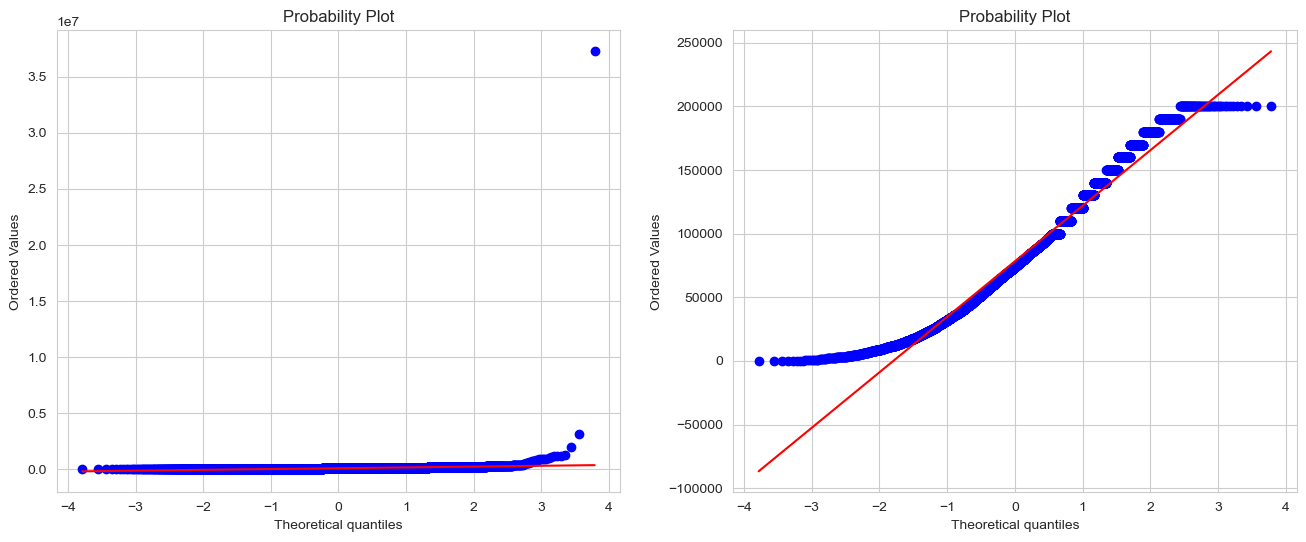

In [29]:
#Probability plots before and after handling outliers
# A probability plot (probplot)—typically used in normality testing, is also a helpful visual tool for identifying outliers 
# and assessing distribution fit. 

# Points far from the line	        Possible outliers
# Points far at the ends only	    Outliers in tails
# Sudden jumps in spacing	        Data irregularities or outliers
# S-shape curve	                    Non-normality + possible outliers

sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_cleaned[feature], plot=plt)

In [30]:
def find_outliers_ZScore_method(input_df, variable):
    df_z_scores = input_df.copy()

    # Calculate Z-scores for the specified variable droping any rows having NaN values
    z_scores = np.abs(stats.zscore(input_df[variable].dropna())) 

    # Add Z-scores as a new column
    df_z_scores[variable + '_Z'] = z_scores  
    return df_z_scores

In [31]:
# Calculate Z-scores for the specified feature
df_z_scores = find_outliers_ZScore_method(df.copy(), feature)
df_z_scores.head()

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location,KM Driven_Z
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura,0.073012
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala,0.152900
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura,0.103255
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura,0.085301
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.79,Badharghat Agartala,0.101687


In [32]:
#Remove outliers w.r.t the Feature. Remove data points where |Z| > 3.

df_z_score_cleaned = df_z_scores[df_z_scores[feature+'_Z'] < 3]

print(f'Cleaned dataset : {df_z_score_cleaned.shape}')
print(f'Outliers count : {len(df_z_scores)-len(df_z_score_cleaned)}')

Cleaned dataset : (9173, 10)
Outliers count : 3


((array([-3.78921844, -3.56286964, -3.43854683, ...,  3.43854683,
          3.56286964,  3.78921844]),
  array([      1,       2,       2, ..., 1160000, 1220000, 1260000])),
 (np.float64(55786.365652105786),
  np.float64(84943.94352992477),
  np.float64(0.8470291525357871)))

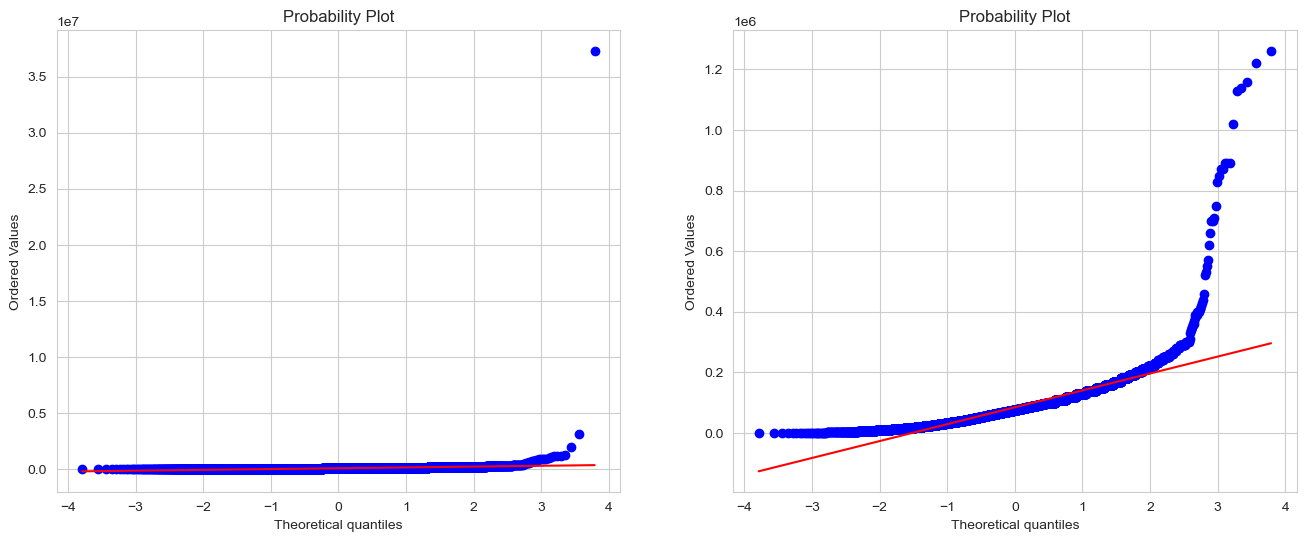

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df_z_scores[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_z_score_cleaned[feature], plot=plt)

Pandas Profile Report

In [34]:
from ydata_profiling import ProfileReport

c:\Users\tilak\anaconda3\envs\comp647ps\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\tilak\anaconda3\envs\comp647ps\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [35]:
profile = ProfileReport(df, title="Profiling Report")

profile.to_file("ProfilingReport.html")

profile.to_file("ProfilingReport.json")

Export report to file: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [36]:
# Copy original dataframe
df_ = df.copy()

# Convert to numeric (force any invalid entries to NaN)
df_['Price(in Lakhs)'] = pd.to_numeric(df_['Price(in Lakhs)'], errors='coerce')

# Drop or fill NaNs before converting to int
df_['Price_Thousands'] = (df_['Price(in Lakhs)'] * 100).dropna().astype(int)


In [37]:
df['Price(in Lakhs)'].isnull().sum()


np.int64(1)

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,9176.0,2017.147777,3.992440,2001.0,2014.0,2017.00,2021.00,2025.0
KM Driven,9176.0,89533.652354,395485.704208,1.0,44735.0,75680.00,110000.00,37270000.0
Price(in Lakhs),9175.0,6.105006,5.334563,0.3,2.7,4.61,7.59,67.0


In [39]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Year', 'KM Driven', 'Price(in Lakhs)'], dtype='object')
Categorical columns: Index(['Car Model', 'Car Variant', 'Fuel Type', 'Transmission Type',
       'Ownership', 'Location'],
      dtype='object')


Correlation bar point 

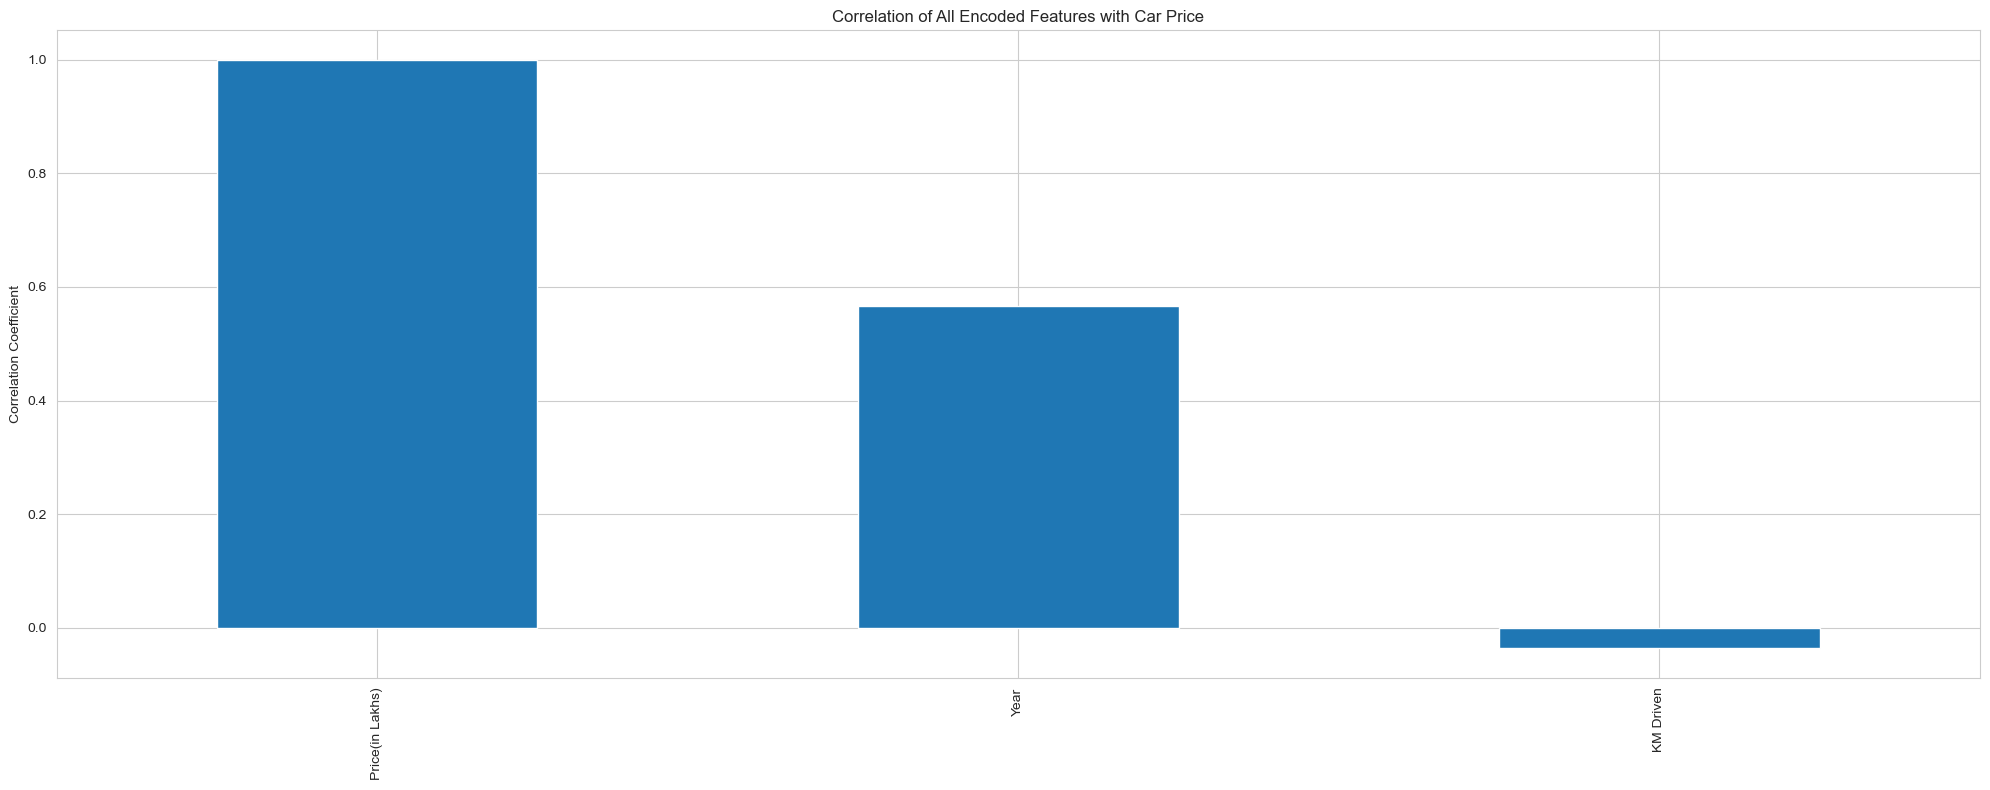

In [40]:
# Copy dataframe
df_encoded = df_.copy()

# Encode categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Now get all numeric columns including encoded ones
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot correlation with Price_Thousands
plt.figure(figsize=(20, 8))
df_encoded[numerical_columns].corr()['Price_Thousands'].drop('Price_Thousands').sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation of All Encoded Features with Car Price")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()


Pair Plot

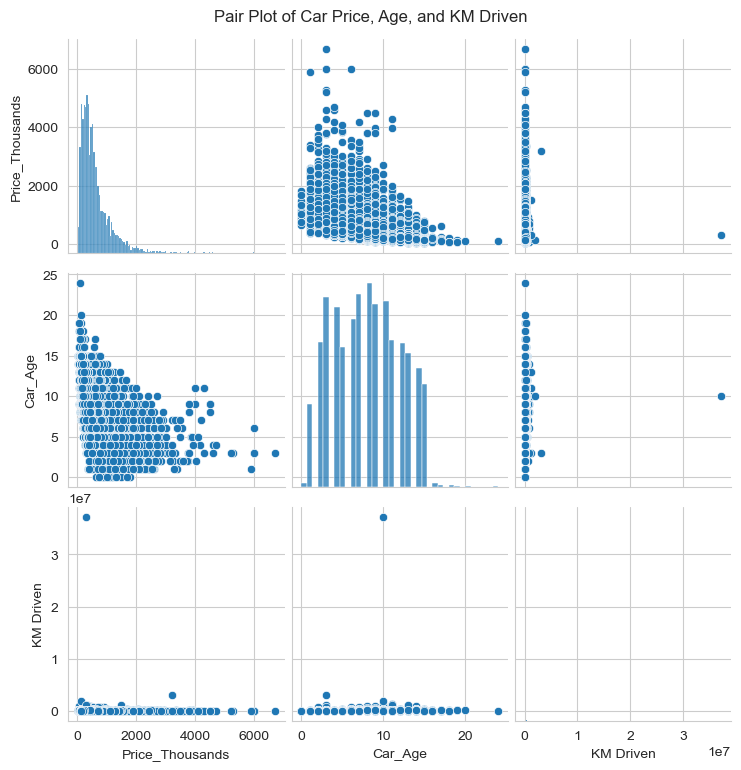

In [41]:
# Create Price_Thousands if not already there
df['Price_Thousands'] = df['Price(in Lakhs)'] * 100

# Create Car_Age from Year (assuming current year is 2025)
df['Car_Age'] = 2025 - df['Year']
# Make sure numeric columns are in place
df_pair = df[['Price_Thousands', 'Car_Age', 'KM Driven']].copy()

# Optional: clean up KM Driven if needed
df_pair['KM Driven'] = pd.to_numeric(df_pair['KM Driven'], errors='coerce')

# Drop rows with missing values to avoid pairplot errors
df_pair.dropna(inplace=True)

# Plot
pair_plot = sns.pairplot(df_pair)
pair_plot.fig.suptitle('Pair Plot of Car Price, Age, and KM Driven', y=1.02)
plt.show()

Line Plot 

C:\Users\tilak\AppData\Local\Temp\ipykernel_21340\3167126629.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KM_bins'] = pd.cut(df['KM Driven'], bins=10)
C:\Users\tilak\AppData\Local\Temp\ipykernel_21340\3167126629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KM_bins_str'] = df['KM_bins'].astype(str)


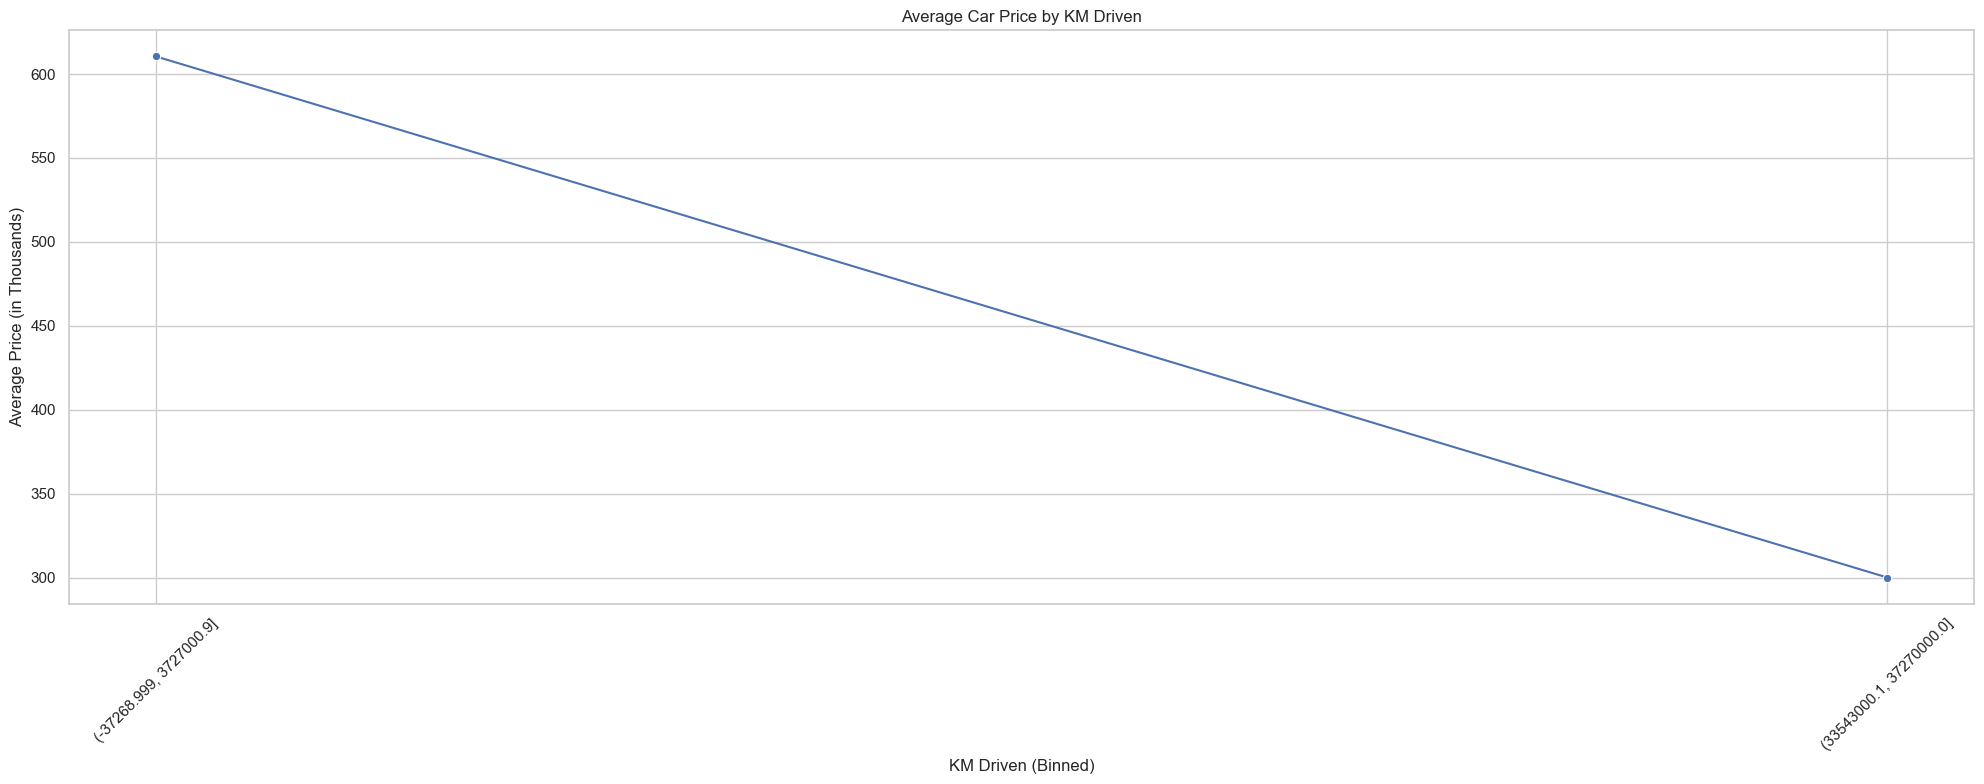

In [42]:
df['Price_Thousands'] = df['Price(in Lakhs)'] * 100

# Clean KM Driven
df['KM Driven'] = pd.to_numeric(df['KM Driven'], errors='coerce')

# Drop missing values to be safe
df = df.dropna(subset=['KM Driven', 'Price_Thousands'])

# Bin KM Driven and convert to string for x-axis
df['KM_bins'] = pd.cut(df['KM Driven'], bins=10)
df['KM_bins_str'] = df['KM_bins'].astype(str)

# Group by bin labels
km_price_df = df.groupby('KM_bins_str')['Price_Thousands'].mean().reset_index()

# Plot
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))
sns.lineplot(data=km_price_df, x='KM_bins_str', y='Price_Thousands', marker='o')

plt.title('Average Car Price by KM Driven')
plt.xlabel('KM Driven (Binned)')
plt.ylabel('Average Price (in Thousands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
